## Week 1 - Data cleaning 

#### What is data cleaning? 
Data cleaning is the process of identifying and removing/modifying the incorrect, duplicate or missing parts of the data to create a reliable dataset. Data cleaning is crucial for the success of Machine Learning applications. 

#### Why is data cleaning important? 
- Machine learning models learn from the data. This implies that the models will only be as good as the data provided.
- Better data > complex algorithms

#### How to perform  data cleaning? 
- Identify and remove rows with single values. If there is no variation in the feature, it is most likely to be useless for modelling. 
- Fix structural errors (no typographical errors and inconsistencies in upper or lower case for categorical features).
- Handle missing values 
- Remove columns with constant or too many values.
- Filter _unwanted_ outliers. 
- Remove unwanted (duplicate / irrelevant) observations.  
- Check for invalid / inconsistent data and rectify where possible
- Check for logical integrity of the data (if applicable)
- Derive new features (if applicable) by combining or performing appropriate operations on the existing features

Now, let's get started...

For this tutorial, install matplotlib package in your virtual environment: `conda install matplotlib` and `conda install seaborn`

### Import Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# to make the plots display inline 
%matplotlib inline 

In [2]:
# Reading from a csv file, into a data frame
df = pd.read_csv('data/MotorInsuranceFraudClaimABTFull.csv')
# Show data frame first few rows
df.head()

ID Insurance Type   Income of Policy Holder Marital Status  Num Claimants  \
0   1              CI                        0            NaN              2   
1   2              CI                        0            NaN              2   
2   3              CI                    54613        Married              1   
3   4              CI                        0            NaN              3   
4   5              CI                        0            NaN              4   

   Injury Type Overnight Hospital Stay  Claim Amount  Total Claimed  \
0  Soft Tissue                      No          1625           3250   
1         Back                     Yes         15028          60112   
2  Broken Limb                      No        -99999              0   
3      Serious                     Yes        270200              0   
4  Soft Tissue                      No          8869              0   

   Num Claims  Num Soft Tissue  % Soft Tissue  Claim Amount Received  \
0           2              2.0            1.0                      0   
1           1              0.0            0.0                  15028   
2           0              0.0            0.0                    572   
3           0              0.0            0.0                 270200   
4           0              0.0            0.0                      0   

   Fraud Flag  
0           1  
1           0  
2           0  
3           0  
4           1

In [3]:
df.dtypes

ID                           int64
Insurance Type              object
Income of Policy Holder      int64
Marital Status              object
Num Claimants                int64
Injury Type                 object
Overnight Hospital Stay     object
Claim Amount                 int64
Total Claimed                int64
Num Claims                   int64
Num Soft Tissue            float64
% Soft Tissue              float64
Claim Amount Received        int64
Fraud Flag                   int64
dtype: object

### Clean the column names

In [4]:
# Clean the column names to remove white space after the name or in the name
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['ID', 'InsuranceType', 'IncomeofPolicyHolder', 'MaritalStatus',
       'NumClaimants', 'InjuryType', 'OvernightHospitalStay', 'ClaimAmount',
       'TotalClaimed', 'NumClaims', 'NumSoftTissue', '%SoftTissue',
       'ClaimAmountReceived', 'FraudFlag'],
      dtype='object')

### Check the cardinality of the columns

In [5]:
# A way to get the number of unique values for all features
df.nunique()

ID                       500
InsuranceType              1
IncomeofPolicyHolder     171
MaritalStatus              3
NumClaimants               4
InjuryType                 4
OvernightHospitalStay      2
ClaimAmount              493
TotalClaimed             235
NumClaims                  7
NumSoftTissue              5
%SoftTissue                9
ClaimAmountReceived      329
FraudFlag                  2
dtype: int64

InsuranceType contains only one value in the entire dataset. The machine learning models have no distinct pattern to learn from this feature. 

### Check for typographical errors

In [6]:
# Convert object columns to category
for column in df.select_dtypes(['object']).columns:
    df[column] = df[column].astype('category')
df.dtypes    

ID                          int64
InsuranceType            category
IncomeofPolicyHolder        int64
MaritalStatus            category
NumClaimants                int64
InjuryType               category
OvernightHospitalStay    category
ClaimAmount                 int64
TotalClaimed                int64
NumClaims                   int64
NumSoftTissue             float64
%SoftTissue               float64
ClaimAmountReceived         int64
FraudFlag                   int64
dtype: object

Although `FraudFlag` is identified as numerical columns, they should rather be categorical. 

In [7]:
df['FraudFlag'] = df['FraudFlag'].astype('category')
df['ID'] = df['ID'].astype('object')

In [8]:
category_columns = df.select_dtypes(['category']).columns
for column in category_columns:
    print(df[column].value_counts(), '\n')

CI    500
Name: InsuranceType, dtype: int64 

Married     99
Single      48
Divorced    23
Name: MaritalStatus, dtype: int64 

Broken Limb    177
Soft Tissue    172
Back           116
Serious         35
Name: InjuryType, dtype: int64 

No     354
Yes    146
Name: OvernightHospitalStay, dtype: int64 

0    332
1    168
Name: FraudFlag, dtype: int64 



Categorical values do not have any typographical errors

### Check for missing values

In [9]:
#% of missing data for all features
100 * (df.isnull().sum()/df.shape[0])

ID                        0.0
InsuranceType             0.0
IncomeofPolicyHolder      0.0
MaritalStatus            66.0
NumClaimants              0.0
InjuryType                0.0
OvernightHospitalStay     0.0
ClaimAmount               0.0
TotalClaimed              0.0
NumClaims                 0.0
NumSoftTissue             2.0
%SoftTissue               0.0
ClaimAmountReceived       0.0
FraudFlag                 0.0
dtype: float64

`MaritalStatus` has missing data for ~two-thirds of the dataset.

### Check for outliers

Outliers are unusually high/low values compared to the other observations in the data.     
Visual approach make it easier to identify the distribution of values and in spotting unusual obserations in the data.

In [10]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)

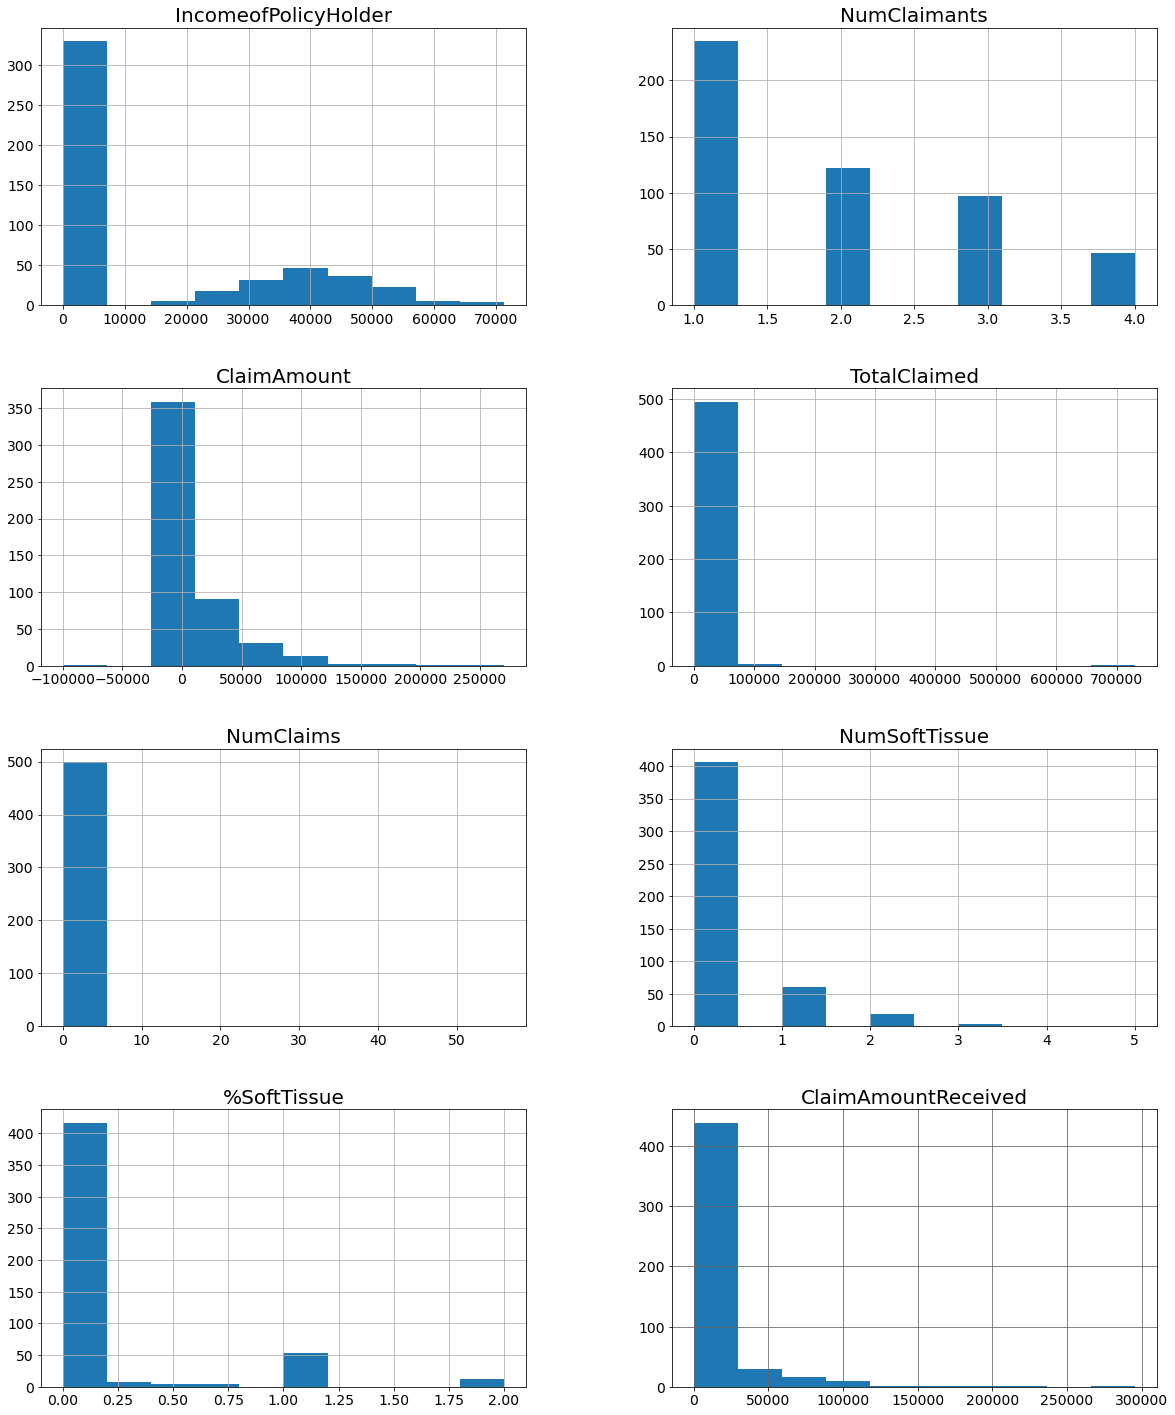

In [11]:
# add semicolon at the end of the code to avoid displaying matplotlib objects
# df.hist plots the distribution of the numerical features 
df.hist(figsize=(20, 25), layout=(4,2));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

From the histograms we can quickly see potential invalid data such as negative numbers (ClaimAmount < 0) or very large numbers (TotalClaimed > 700k) or very man zeroes (IncomeofPolicyHolder). Another way to see outliers and potential errors is to look at boxplots for each feature.

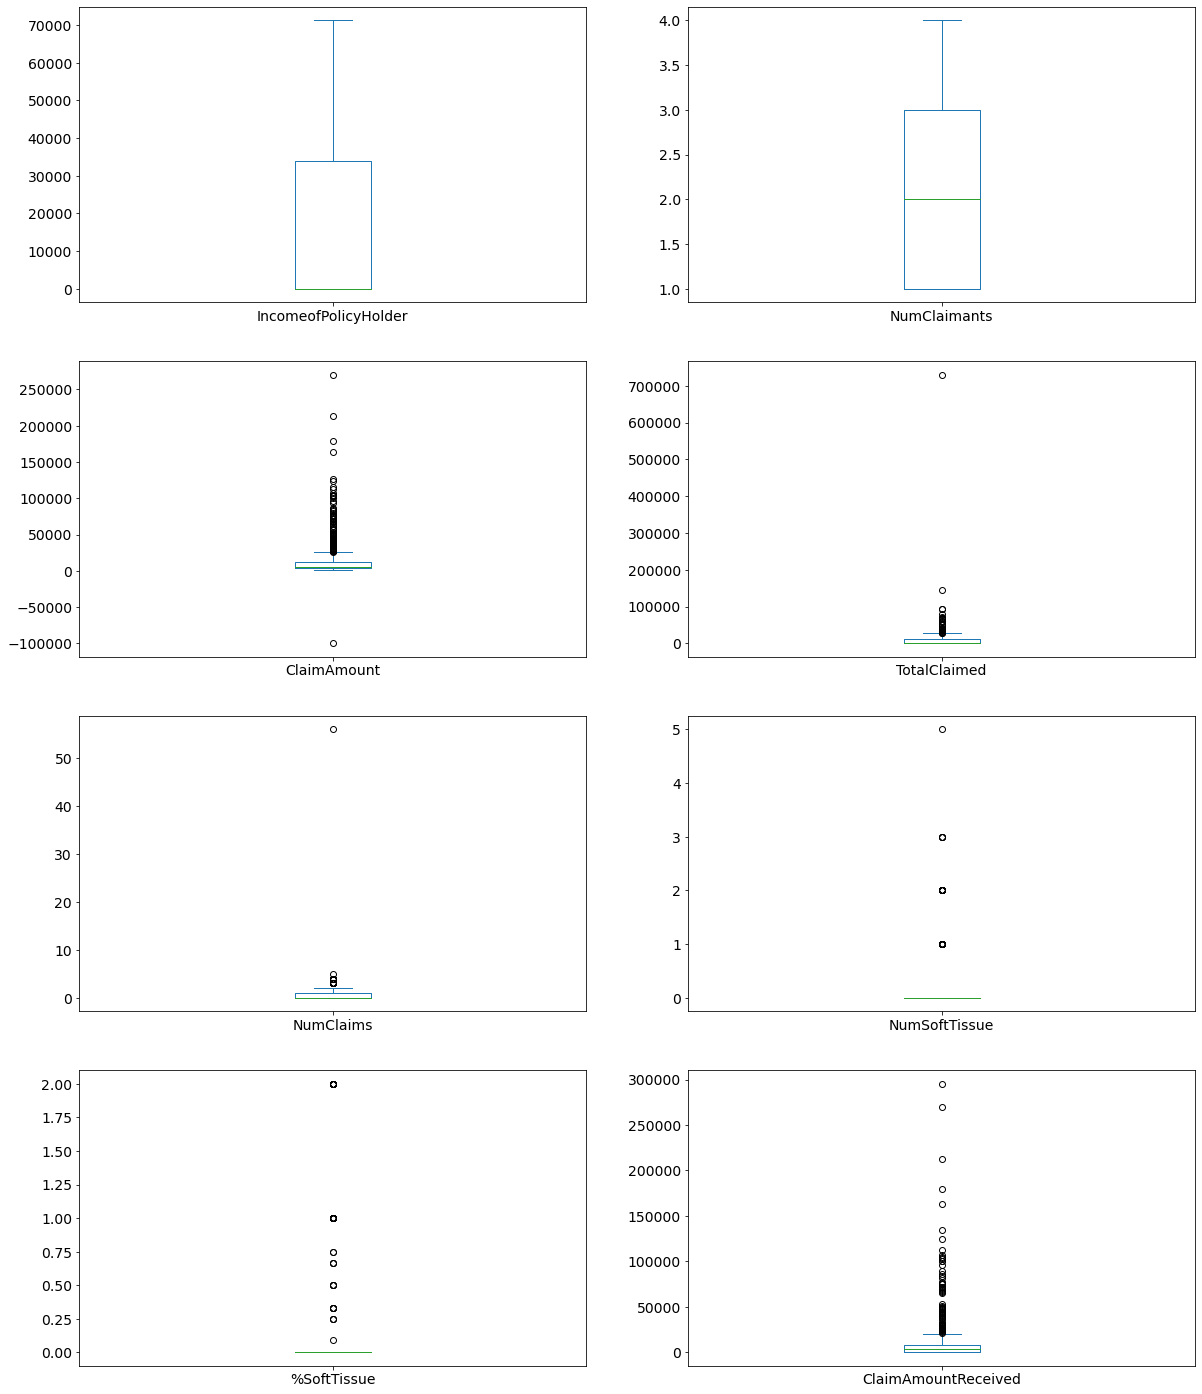

In [12]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
df[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25), layout=(4, 2), sharex=False, sharey=False);

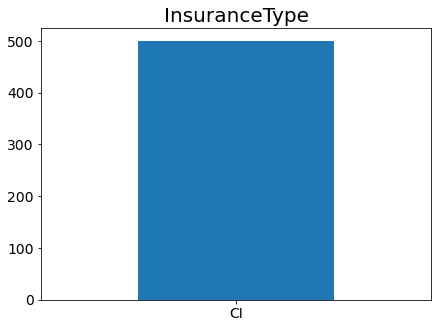

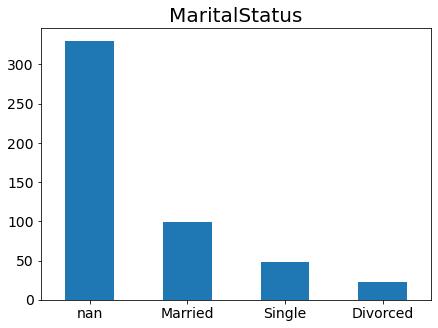

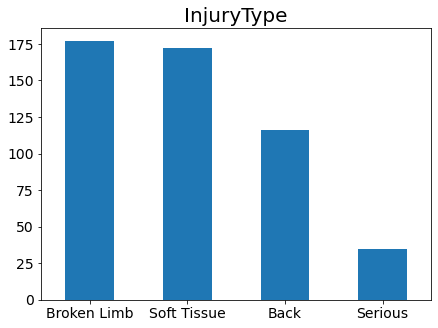

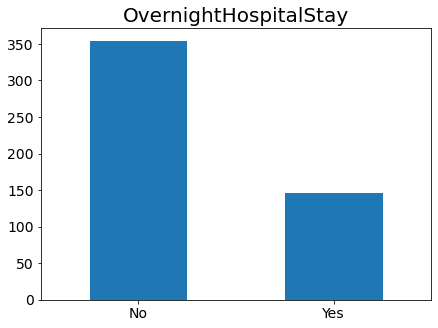

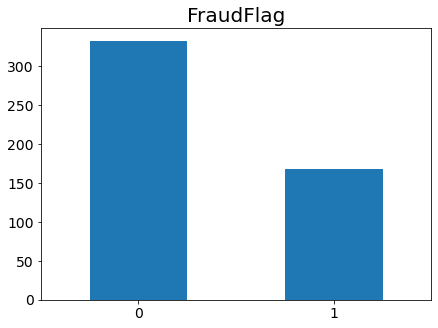

In [13]:
categorical_columns = df.select_dtypes(['category']).columns
for column in category_columns:
    df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(7,5), rot=0)
    plt.show()

From the barplots of categorical features we note that InsuranceType has a cardinality of 1 and that MaritalStatus has many missing values. 

### Summary of the issues in data and potential handling strategies

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|ID (object)                          |   Unique identifier not to be used as feature in data preparation|Keep to be able to link example to actual customer, but do not use for data preparation|
InsuranceType (category)             | Irregular Cardinality (1)              | Constant column, drop feature       
IncomeofPolicyHolder (int64)       | More than 50% values are 0 | Investigate cause and decide what to do with this feature|
MaritalStatus (category)             | Missing Values (66%)       | Too many missing values, drop feature  | 
NumClaimants (int64)                 | None | Keep as is|   
InjuryType (category)                | None | Keep as is|
OvernightHospitalStay (category)    | None | Keep as is|
ClaimAmount (int64)         | Negative feature value (-99999) | Investigate cause of error and how many rows are affected. If invalid data and only few rows affected, drop rows|
ClaimAmount (int64)                  | Outliers (high) | Clamp high outliers to the 95th percentile |
TotalClaimed (int64)                 | Outlier, very large value (729k) | Investigate rows where this value appears. If invalid data and only few rows affected, drop rows |    
NumClaims (int64)                    | Outlier, very large value (>50) | Investigate rows where this value appears. If invalid data and only few rows affected, drop rows  |   
NumSoft Tissue (float64)             | Missing values (2%) | Investigate rows affected, consider imputation |
%SoftTissue (float64)               | None | Keep as is|
ClaimAmountReceived (int64)         | Outliers (high) | Clamp high outliers to the 95th percentile|
FraudFlag                 (category) |Unbalanced number of 0 and 1 (proportion of 0: 66%)  | Leave as is; may consider sampling strategies to balance the training dataset|

### Clean the data using the strategies:

In [14]:
# Keep a copy of the original data
df_raw = df.copy()

In [15]:
# Drop column InsuranceType
df = df.drop('InsuranceType', axis=1)
df.head()

ID  IncomeofPolicyHolder MaritalStatus  NumClaimants   InjuryType  \
0  1                     0           NaN             2  Soft Tissue   
1  2                     0           NaN             2         Back   
2  3                 54613       Married             1  Broken Limb   
3  4                     0           NaN             3      Serious   
4  5                     0           NaN             4  Soft Tissue   

  OvernightHospitalStay  ClaimAmount  TotalClaimed  NumClaims  NumSoftTissue  \
0                    No         1625          3250          2            2.0   
1                   Yes        15028         60112          1            0.0   
2                    No       -99999             0          0            0.0   
3                   Yes       270200             0          0            0.0   
4                    No         8869             0          0            0.0   

   %SoftTissue  ClaimAmountReceived FraudFlag  
0          1.0                    0         1  
1          0.0                15028         0  
2          0.0                  572         0  
3          0.0               270200         0  
4          0.0                    0         1

In [16]:
df[df['IncomeofPolicyHolder'] == 0]

ID  IncomeofPolicyHolder MaritalStatus  NumClaimants   InjuryType  \
0      1                     0           NaN             2  Soft Tissue   
1      2                     0           NaN             2         Back   
3      4                     0           NaN             3      Serious   
4      5                     0           NaN             4  Soft Tissue   
5      6                     0           NaN             1  Broken Limb   
..   ...                   ...           ...           ...          ...   
492  493                     0           NaN             1  Soft Tissue   
494  495                     0           NaN             2         Back   
495  496                     0           NaN             1  Soft Tissue   
497  498                     0           NaN             1  Broken Limb   
499  500                     0           NaN             1  Broken Limb   

    OvernightHospitalStay  ClaimAmount  TotalClaimed  NumClaims  \
0                      No         1625          3250          2   
1                     Yes        15028         60112          1   
3                     Yes       270200             0          0   
4                      No         8869             0          0   
5                     Yes        17480             0          0   
..                    ...          ...           ...        ...   
492                   Yes         2569         20055          1   
494                    No         3813          9882          3   
495                    No         2118             0          0   
497                   Yes        32469             0          0   
499                    No         8259             0          0   

     NumSoftTissue  %SoftTissue  ClaimAmountReceived FraudFlag  
0              2.0          1.0                    0         1  
1              0.0          0.0                15028         0  
3              0.0          0.0               270200         0  
4              0.0          0.0                    0         1  
5              0.0          0.0                17480         0  
..             ...          ...                  ...       ...  
492            NaN          0.0                 2569         0  
494            0.0          0.0                    0         1  
495            0.0          0.0                    0         1  
497            0.0          0.0                16763         0  
499            0.0          0.0                    0         1  

[330 rows x 13 columns]

In [17]:
df[df['IncomeofPolicyHolder'] == 0].shape

(330, 13)

In [18]:
df[df['MaritalStatus'].isnull()].shape

(330, 13)

Seems like records for which `IncomeofPolicyHolder` is 0, `MarritalStatus` is also null. Therefore, it is better to drop both these features for now. 

In [19]:
# Drop column IncomeofPolicyHolder and MaritalStatus
df = df.drop(['IncomeofPolicyHolder', 'MaritalStatus'], axis=1)
df.head()

ID  NumClaimants   InjuryType OvernightHospitalStay  ClaimAmount  \
0  1             2  Soft Tissue                    No         1625   
1  2             2         Back                   Yes        15028   
2  3             1  Broken Limb                    No       -99999   
3  4             3      Serious                   Yes       270200   
4  5             4  Soft Tissue                    No         8869   

   TotalClaimed  NumClaims  NumSoftTissue  %SoftTissue  ClaimAmountReceived  \
0          3250          2            2.0          1.0                    0   
1         60112          1            0.0          0.0                15028   
2             0          0            0.0          0.0                  572   
3             0          0            0.0          0.0               270200   
4             0          0            0.0          0.0                    0   

  FraudFlag  
0         1  
1         0  
2         0  
3         0  
4         1

In [20]:
df[df['TotalClaimed'] > 700000]

ID  NumClaimants InjuryType OvernightHospitalStay  ClaimAmount  \
21  22             3       Back                    No         8688   

    TotalClaimed  NumClaims  NumSoftTissue  %SoftTissue  ClaimAmountReceived  \
21        729792         56            5.0     0.089286                 8688   

   FraudFlag  
21         0

In [21]:
df[df['NumClaims'] > 50]

ID  NumClaimants InjuryType OvernightHospitalStay  ClaimAmount  \
21  22             3       Back                    No         8688   

    TotalClaimed  NumClaims  NumSoftTissue  %SoftTissue  ClaimAmountReceived  \
21        729792         56            5.0     0.089286                 8688   

   FraudFlag  
21         0

Drop row as it does not look like any other individual claim.

In [22]:
# Drop row with large outlier
df = df.drop(df[df['NumClaims'] > 50].index)
# Check if row was indeed droped
df[df['TotalClaimed'] > 700000]

Empty DataFrame
Columns: [ID, NumClaimants, InjuryType, OvernightHospitalStay, ClaimAmount, TotalClaimed, NumClaims, NumSoftTissue, %SoftTissue, ClaimAmountReceived, FraudFlag]
Index: []

In [23]:
# Look at rows where 'NumSoftTissue' is missing.
missing_NumSoftTissue = df[df['NumSoftTissue'].isnull()]
missing_NumSoftTissue

ID  NumClaimants   InjuryType OvernightHospitalStay  ClaimAmount  \
8      9             1  Soft Tissue                    No         2067   
26    27             3  Broken Limb                   Yes         7193   
146  147             1  Soft Tissue                    No         4811   
149  150             2         Back                    No         2200   
220  221             2  Soft Tissue                    No         3383   
404  405             2      Serious                   Yes         7248   
422  423             3  Broken Limb                    No         4197   
479  480             1  Broken Limb                    No        33739   
492  493             1  Soft Tissue                   Yes         2569   
496  497             4  Broken Limb                   Yes         3199   

     TotalClaimed  NumClaims  NumSoftTissue  %SoftTissue  ClaimAmountReceived  \
8               0          0            NaN          0.0                 2067   
26              0          0            NaN          0.0                 7193   
146             0          0            NaN          0.0                    0   
149         21923          4            NaN          0.0                 2200   
220             0          0            NaN          0.0                 3383   
404             0          0            NaN          0.0                 7248   
422         61915          3            NaN          0.0                 4197   
479         10608          1            NaN          0.0                33739   
492         20055          1            NaN          0.0                 2569   
496             0          0            NaN          0.0                    0   

    FraudFlag  
8           0  
26          0  
146         1  
149         0  
220         0  
404         0  
422         0  
479         0  
492         0  
496         1

In [24]:
# Look at rows where 'NumSoftTissue' is not missing and the values for %SoftTissue.
df[df['NumSoftTissue'].notnull()]

ID  NumClaimants   InjuryType OvernightHospitalStay  ClaimAmount  \
0      1             2  Soft Tissue                    No         1625   
1      2             2         Back                   Yes        15028   
2      3             1  Broken Limb                    No       -99999   
3      4             3      Serious                   Yes       270200   
4      5             4  Soft Tissue                    No         8869   
..   ...           ...          ...                   ...          ...   
494  495             2         Back                    No         3813   
495  496             1  Soft Tissue                    No         2118   
497  498             1  Broken Limb                   Yes        32469   
498  499             1  Broken Limb                    No       179448   
499  500             1  Broken Limb                    No         8259   

     TotalClaimed  NumClaims  NumSoftTissue  %SoftTissue  ClaimAmountReceived  \
0            3250          2            2.0          1.0                    0   
1           60112          1            0.0          0.0                15028   
2               0          0            0.0          0.0                  572   
3               0          0            0.0          0.0               270200   
4               0          0            0.0          0.0                    0   
..            ...        ...            ...          ...                  ...   
494          9882          3            0.0          0.0                    0   
495             0          0            0.0          0.0                    0   
497             0          0            0.0          0.0                16763   
498             0          0            0.0          0.0               179448   
499             0          0            0.0          0.0                    0   

    FraudFlag  
0           1  
1           0  
2           0  
3           0  
4           1  
..        ...  
494         1  
495         1  
497         0  
498         0  
499         1  

[489 rows x 11 columns]

In [25]:
# It seems that when '%SoftTissue' is 0, so is NumSoftTissue, so we will replace Nan with 0.
df['NumSoftTissue'] = df['NumSoftTissue'].replace(np.nan, 0)
df[df['NumSoftTissue'].isnull()]

Empty DataFrame
Columns: [ID, NumClaimants, InjuryType, OvernightHospitalStay, ClaimAmount, TotalClaimed, NumClaims, NumSoftTissue, %SoftTissue, ClaimAmountReceived, FraudFlag]
Index: []

In [26]:
# Look at feature ClaimAmount
df[df['ClaimAmount'] < 0]

ID  NumClaimants   InjuryType OvernightHospitalStay  ClaimAmount  \
2  3             1  Broken Limb                    No       -99999   

   TotalClaimed  NumClaims  NumSoftTissue  %SoftTissue  ClaimAmountReceived  \
2             0          0            0.0          0.0                  572   

  FraudFlag  
2         0

ClaimAmount and ClaimAmoutnReceived seem to have same value for all cases with FraudFlag=0. 
We will replace the negative value with the ClaimAmountReceived value.

In [27]:
df['ClaimAmount'] = df['ClaimAmount'].replace(-99999, 572)
df[df['ClaimAmount'] < 0]

Empty DataFrame
Columns: [ID, NumClaimants, InjuryType, OvernightHospitalStay, ClaimAmount, TotalClaimed, NumClaims, NumSoftTissue, %SoftTissue, ClaimAmountReceived, FraudFlag]
Index: []

In [28]:
#Update the numeric features after dropping some columns.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['NumClaimants', 'ClaimAmount', 'TotalClaimed', 'NumClaims',
       'NumSoftTissue', '%SoftTissue', 'ClaimAmountReceived'],
      dtype='object')

In [29]:
for feature in numeric_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts(dropna=False).nlargest(15), "\n\n\n")

NumClaimants
----------

Range NumClaimants is:  3
----------
Value  Number of Instances
1    235
2    122
3     96
4     46
Name: NumClaimants, dtype: int64 



ClaimAmount
----------

Range ClaimAmount is:  269815
----------
Value  Number of Instances
8065      2
3640      2
2390      2
3771      2
3383      2
4384      2
5097      2
4200      1
11052     1
104534    1
7202      1
2223      1
48671     1
4411      1
112386    1
Name: ClaimAmount, dtype: int64 



TotalClaimed
----------

Range TotalClaimed is:  144000
----------
Value  Number of Instances
0        266
3250       1
7061       1
2303       1
7527       1
14698      1
5284       1
4252       1
7239       1
22420      1
28381      1
3565       1
7903       1
39479      1
2812       1
Name: TotalClaimed, dtype: int64 



NumClaims
----------

Range NumClaims is:  5
----------
Value  Number of Instances
0    265
1    188
3     22
4     19
2      4
5      1
Name: NumClaims, dtype: int64 



NumSoftTissue
----------

Range N

`ClaimAmount` and `ClaimAmountReceived` have very large range. Clamp to the 95 percentile.

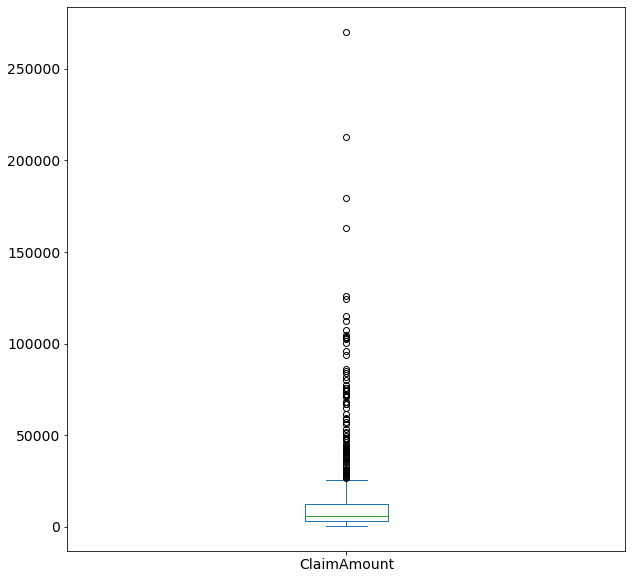

In [30]:
df['ClaimAmount'].plot(kind='box', figsize=(10,10));

In [31]:
np.percentile(df['ClaimAmount'], 75)

12306.0

In [32]:
perc95 = np.percentile(df['ClaimAmount'], 95)
perc95

75631.9

In [33]:
df[df['ClaimAmount'] > perc95].shape

(25, 11)

25 rows affected for `ClaimAmount` for 95 percentile

In [34]:
# Clamp high outiers for 'ClaimAmount' to perc95. This affects 25 rows in the data.
high_claim_index = df['ClaimAmount'] > perc95
high_claim_index.head()

0    False
1    False
2    False
3     True
4    False
Name: ClaimAmount, dtype: bool

In [35]:
# Change all values above perc95 to the value of perc95
df.loc [high_claim_index, 'ClaimAmount'] = perc95

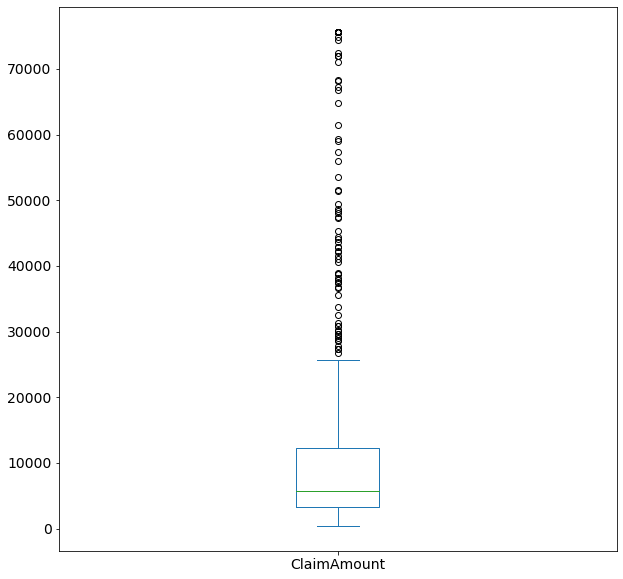

In [36]:
# Replot the clamped feature
df['ClaimAmount'].plot(kind='box', figsize=(10,10));

In [37]:
# Do the same for ClaimAmountReceived
perc95 = np.percentile(df['ClaimAmountReceived'], 95)
perc95

71946.0

In [38]:
df[df['ClaimAmountReceived'] > perc95].shape

(25, 11)

In [39]:
# Clamp high outiers for 'ClaimAmountReceived' to perc95. This affects 25 rows in the data.
high_claim_index = df['ClaimAmountReceived'] > perc95
high_claim_index.head()

0    False
1    False
2    False
3     True
4    False
Name: ClaimAmountReceived, dtype: bool

In [40]:
# Change all values above perc95 to the value of perc95
df.loc [high_claim_index, 'ClaimAmountReceived'] = perc95

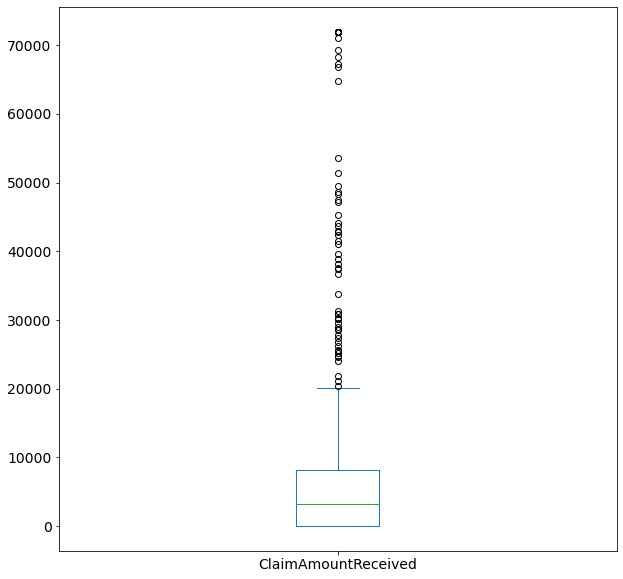

In [41]:
# Replot the clamped feature
df['ClaimAmountReceived'].plot(kind='box', figsize=(10,10));

In [42]:
# Stats for numeric features.
df.describe(include=['int', 'float']).T

count          mean           std    min     25%     50%  \
NumClaimants         499.0      1.905812      1.012545    1.0     1.0     2.0   
ClaimAmount          499.0  14640.359719  20654.315863  385.0  3311.5  5658.0   
TotalClaimed         499.0   8153.909820  15174.529615    0.0     0.0     0.0   
NumClaims            499.0      0.687375      0.997215    0.0     0.0     0.0   
NumSoftTissue        499.0      0.220441      0.544692    0.0     0.0     0.0   
%SoftTissue          499.0      0.172178      0.428429    0.0     0.0     0.0   
ClaimAmountReceived  499.0  10660.010020  18860.482856    0.0     0.0  3238.0   

                         75%       max  
NumClaimants             3.0       4.0  
ClaimAmount          12306.0   75631.9  
TotalClaimed         11171.5  144000.0  
NumClaims                1.0       5.0  
NumSoftTissue            0.0       3.0  
%SoftTissue              0.0       2.0  
ClaimAmountReceived   8118.0   71946.0

In [43]:
# Stats for category features.
df.describe(include="category").T

count unique          top freq
InjuryType              499      4  Broken Limb  177
OvernightHospitalStay   499      2           No  353
FraudFlag               499      2            0  331

In [44]:
df.dtypes

ID                         object
NumClaimants                int64
InjuryType               category
OvernightHospitalStay    category
ClaimAmount               float64
TotalClaimed                int64
NumClaims                   int64
NumSoftTissue             float64
%SoftTissue               float64
ClaimAmountReceived         int64
FraudFlag                category
dtype: object

In [45]:
df.nunique()

ID                       499
NumClaimants               4
InjuryType                 4
OvernightHospitalStay      2
ClaimAmount              468
TotalClaimed             234
NumClaims                  6
NumSoftTissue              4
%SoftTissue                8
ClaimAmountReceived      304
FraudFlag                  2
dtype: int64

In [46]:
df.isnull().sum()

ID                       0
NumClaimants             0
InjuryType               0
OvernightHospitalStay    0
ClaimAmount              0
TotalClaimed             0
NumClaims                0
NumSoftTissue            0
%SoftTissue              0
ClaimAmountReceived      0
FraudFlag                0
dtype: int64

All features seem ok now, no missing values or strange values.
Save the new data frame to a file with a name that reflects that the data has been cleaned.

In [47]:
# Write the cleaned dataframe to a csv file
df.to_csv('../data/MotorInsuranceFraudClaimABTFull_cleaned.csv', index=False)

### Exercsie


Load `adult.csv` and prepare a clean dataset. This data was extracted from the census bureau database found at http://www.census.gov/ftp/pub/DES/www/welcome.html. The task is to clean the dataset for applying classification algorithms eventually. The classification task would be to predict the income of the person based on the different features. 

#### Feature Explanations


|Variable Names |Description |   
|:-------------------------|:-----------------------------|
age | continuous.|
workclass | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt | continuous.|
education |Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num | continuous.
marital-status | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race |White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex | Female, Male.
capital-gain | continuous.
capital-loss | continuous.
hours-per-week | continuous.
native-country | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
income| >50K, <=50K

**Note:** 
1. Check for missing values, invalid data
2. For all features containing too many categories, try to reduce the number of categories if you think it is useful information for prediction of income.

In [5]:
import pandas as pd
import numpy as np

# 보기 좋게 표시 설정
#pd.set_option("display.max_rows", 100)
#pd.set_option("display.max_columns", 50)
#pd.set_option("display.width", 120)

df = pd.read_csv('adult.csv')

print("Loaded adult.csv")
print("Shape:", df.shape)
df.head()


Loaded adult.csv
Shape: (32571, 15)


age          workclass  fnlwgt   education  education-num       marital-status          occupation    relationship  \
0   39          State-gov   77516   Bachelors             13        Never-married        Adm-clerical   Not-in-family   
1   50   Self-emp-not-inc   83311   Bachelors             13   Married-civ-spouse     Exec-managerial         Husband   
2   38            Private  215646     HS-grad              9             Divorced   Handlers-cleaners   Not-in-family   
3   53            Private  234721        11th              7   Married-civ-spouse   Handlers-cleaners         Husband   
4   28            Private  338409   Bachelors             13   Married-civ-spouse      Prof-specialty            Wife   

     race      sex  capital-gain  capital-loss  hours-per-week  native-country  income  
0   White     Male          2174             0              40   United-States   <=50K  
1   White     Male             0             0              13   United-States   <=50K  
2   White     Male             0             0              40   United-States   <=50K  
3   Black     Male             0             0              40   United-States   <=50K  
4   Black   Female             0             0              40            Cuba   <=50K

In [9]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [11]:
df.nunique(dropna=False).sort_values(ascending=False)

fnlwgt            21648
capital-gain        119
hours-per-week       94
capital-loss         92
age                  73
native-country       42
education            16
education-num        16
occupation           15
workclass             9
marital-status        7
relationship          6
race                  5
sex                   2
income                2
dtype: int64

In [13]:
print("Sample value counts for 'workclass':\n", df['workclass'].value_counts(dropna=False).head(10))


Sample value counts for 'workclass':
 workclass
Private             22704
Self-emp-not-inc     2542
Local-gov            2093
?                    1836
State-gov            1299
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [21]:
# ? -> NaN
obj_cols = df.select_dtypes(include=['object']).columns
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip()

df.replace('?', np.nan, inplace=True)

missing_per_col = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_per_col, "\n")
print("Total missing values in dataframe:", int(df.isna().sum().sum()))


Missing values per column:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64 

Total missing values in dataframe: 0


In [23]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
desc = df[num_cols].describe()
print(desc)

neg_counts = (df[num_cols] < 0).sum()
print("\nNegative counts by column:\n", neg_counts)


                age        fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count  32571.000000  3.257100e+04   32571.000000  32571.000000  32571.000000    32571.000000
mean      38.582512  1.897863e+05      10.080777   1077.317982     87.277026       40.437506
std       13.640623  1.055484e+05       2.572477   7384.182377    402.901257       12.345725
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000        1.000000
25%       28.000000  1.178330e+05       9.000000      0.000000      0.000000       40.000000
50%       37.000000  1.783830e+05      10.000000      0.000000      0.000000       40.000000
75%       48.000000  2.370650e+05      12.000000      0.000000      0.000000       45.000000
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000       99.000000

Negative counts by column:
 age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64


In [25]:
fill_unknown_cols = ['workclass', 'occupation', 'native-country']
for c in fill_unknown_cols:
    df[c] = df[c].fillna('Unknown')

missing_after = df.isna().sum().sort_values(ascending=False)
print("Missing values per column AFTER fill:\n", missing_after)
print("\nTotal missing AFTER fill:", int(df.isna().sum().sum()))


Missing values per column AFTER fill:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Total missing AFTER fill: 0


In [27]:
# native-country → United-States vs Other
df['native-country'] = np.where(df['native-country'] == 'United-States', 'United-States', 'Other')

print("native-country value counts:\n", df['native-country'].value_counts())

print("\nworkclass categories:", sorted(df['workclass'].unique().tolist()))
print("occupation categories (len={}):".format(df['occupation'].nunique()), sorted(df['occupation'].unique().tolist()))


native-country value counts:
 native-country
United-States    29177
Other             3394
Name: count, dtype: int64

workclass categories: ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', 'nan']
occupation categories (len=15): ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'nan']


In [31]:
# numeric
numeric_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# category
cat_cols = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
for c in cat_cols:
    df[c] = df[c].astype('category')

# income_binary
df['income_binary'] = df['income'].map({'>50K':1, '<=50K':0}).astype('int8')

print("Class balance (income):\n", df['income'].value_counts(normalize=True))
print("\nPreview of dtypes:\n", df.dtypes)


Class balance (income):
 income
<=50K    0.759234
>50K     0.240766
Name: proportion, dtype: float64

Preview of dtypes:
 age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
income_binary         int8
dtype: object


In [33]:
stats_std = df[numeric_cols].std()
stats_median = df[numeric_cols].median()
summary_stats = pd.DataFrame({'std': stats_std, 'median': stats_median})
summary_stats


std    median
age                 13.640623      37.0
fnlwgt          105548.390541  178383.0
education-num        2.572477      10.0
capital-gain      7384.182377       0.0
capital-loss       402.901257       0.0
hours-per-week      12.345725      40.0

In [ ]:
clean_cols = ['age','workclass','fnlwgt','education','education-num','marital-status',
              'occupation','relationship','race','sex','capital-gain','capital-loss',
              'hours-per-week','native-country','income','income_binary']

df_clean = df[clean_cols].copy()
df_clean.to_csv('adult_clean.csv', index=False)

print("Saved cleaned dataset to adult_clean.csv")
df_clean.head()
